<a href="https://colab.research.google.com/github/mohd-faizy/03_TensorFlow_In-Practice/blob/master/05_Improving_The_CV_Accuracy_Using_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Improving Computer Vision Accuracy using Convolutions__

In the previous lessons you saw how to do fashion recognition using a __Deep Neural Network (DNN)__ containing __three layers__:


- The $\color{red}{\textbf{Input-layer}}$ is in the __shape of the data__.
- The $\color{red}{\textbf{Output-layer}}$ is in the shape of the __Desired output__ and a __hidden layer__.

You experimented with the __impact of different sizes of hidden layer__, __number of training epochs__ etc on the _final accuracy_.

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end. 

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images / 255.0
test_images=test_images / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4936 - accuracy: 0.8281
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3701 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3345 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3120 - accuracy: 0.8849
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8773


> Your accuracy is probably about $89$% __on training__ and $87$% __on validation__ not bad... _But how do you make that even better?_ $\rightarrow$ One way is to use something called $\color{red}{\textbf{Convolutions}}$ that is narrowing down the content of the image to _focus on specific, distinct, details_. 

- Take an array (usually `3x3 or 5x5`) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like __Edge detection__.
 - So, for example, `3x3 filter` that is defined for __Edge detection__ where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the __edges enhanced.__


_This is perfect for computer vision_, because often it's features that can get highlighted like this that distinguish one item for another, and __the amount of information needed is then much less__...because you'll just train on the __highlighted features__.

That's the concept of __Convolutional Neural Networks__.
 - Add some layers to do __Convolution__ before you have the __Dense layers__, and then the _Information going to the dense layers is more focussed_, and possibly _more accurate_.

> __Run the below code__ $\Rightarrow$ This is the same __Neural Network__ as earlier, but this time with $\Rightarrow$ __Convolutional layers added first__. It will __take longer__, but look at the __impact on the accuracy__:

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Total Dataset contaibns 60'000 Training sample & 10'000 Test samples
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)


2.2.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)         

> It's likely gone up to about $93$% __(approx.) on the training data__ and $91$% __on the validation data__. 

    That's Significant, and a step in the right direction!

Try running it for more $epochs$ -- say about $20$, and explore the $results!$ But while the results might seem really good, _the validation results may actually go down_, due to something called $Overfitting$.

> $overfitting$ occurs when the __Network learns the data from the training set really well__, but it's too specialised to only that data, and as a _result is less effective at seeing other data_.
 - For $Example$, if all your life you only saw $red$ shoes, then when you see a $red$ shoe you would be very good at identifying it, but $blue$ shoes might confuse you...and you know you should never mess with my $blue$.

Then, look at the code again, and see, step by step how the $Convolutions$ were built:

> __Step 1:__ is to _gather the data_. You'll notice that there's a bit of a change here in that the __training data needed to be reshaped__.
-  That's because the __first convolution__ expects a __single tensor containing everything__, so instead of `60,000  28x28x1` items in a list, we have a `single 4D` list that is `60,000x28x28x1`, and the __same for the test images__ 
 - If you don't do this, you'll get an $Error$ when training as _the Convolutions do not recognize the shape_. 



```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```


__Next is to define your__ $model$.


---



Now instead of the __input layer at the top__, we add a $Convolution$. The parameters are:

1. The $NUMBER$ of _Convolutions_ you want to __generate__. Purely arbitrary, but good to start with something in the order of $32$
2. The $SIZE$ of the Convolution, in this case a __3x3 grid__
3. The $ACTIVATION$ function to use -- in this case we'll use $RELU$, which you might recall is the equivalent of returning x when x > 0, else returning 0
4. In the first layer, the shape of the __Input data__.

> __Convolution__ Followed by $\Rightarrow$ __MaxPooling layer__ which is then designed to _compress the image_, while maintaining the content of the features that were highlighted by the convlution.
 -  By Specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. the idea is that it creates a __2x2 array of pixels__, and picks the __biggest one__, thus turning $4$ pixels into $1$ . It repeats this across the image, and in so doing halves the number of $Horizontal$, and halves the number of $Vertical$ pixels, effectively reducing the image by $25$%.

You can call `model.summary()` to see the _size and shape_ of the network, and you'll notice that after every $MaxPooling$ layer, the image size is $reduced$ in this way. 


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


_Add another_ $Convolution$



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```


Now $flatten$ the output. After this you'll just have the same $DNN$ structure as the non convolutional version

```
  tf.keras.layers.Flatten(),
```


The same $128$ dense layers, and $10$ output layers as in the pre-convolution example:



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


Now `compile` the model, call the `fit` method to do the training, and `evaluate` the _loss and accuracy_ from the test set.



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```


# __Visualizing the Convolutions and Pooling__

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first $100$ labels in the test set, and you can see that the ones at __index 0, index 23 and index 28__ are all the __same value (9)__.__They're all shoes.__ 

Let's take a look at the result of running the $Convolution$ on each, and you'll begin to see common features between them emerge.


Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


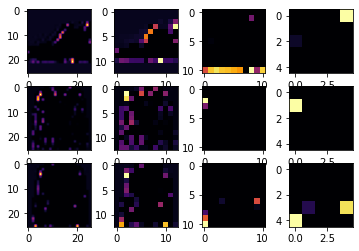

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## __EXERCISES__

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.2.0
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1870 - accuracy: 0.9450
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9811
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0384 - accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0262 - accuracy: 0.9918
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0475 - accuracy: 0.9850
0.9850000143051147



# __Ex-1__
```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


```
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0175 - accuracy: 0.9945
313/313 [==============================] - 1s 2ms/step - loss: 0.0475 - accuracy: 0.9850
0.9850000143051147
```





# __Ex-2__

```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```



```
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0139 - accuracy: 0.9956
313/313 [==============================] - 1s 2ms/step - loss: 0.0452 - accuracy: 0.9871
0.9871000051498413
```

# __Ex-3__

```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```



```
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0160 - accuracy: 0.9945
313/313 [==============================] - 1s 2ms/step - loss: 0.0350 - accuracy: 0.9893
0.989300012588501
```





# __Ex-4__

```
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
```



```
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2934 - accuracy: 0.8921
313/313 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8773
```



In [ ]:
import tensorflow as tf
print(tf.__version__)
# Defining the callback class
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nReached 96% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.2.0
4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3831 - accuracy: 0.8651
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2562 - accuracy: 0.9070
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2065 - accuracy: 0.9250
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1746 - accuracy: 0.9365
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1458 - accuracy: 0.9457
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1207 - accuracy: 0.9557
Epoch 7/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.1010 - accuracy: 0.9620
Reached 96% accuracy so cancelling training!
313/313 [==============================] - 1s 2ms/step - loss: 0.2714 - accuracy: 0.9156
0.9156000018119812


In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0



model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.2.0
4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3785 - accuracy: 0.8645
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9065
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2102 - accuracy: 0.9224
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1748 - accuracy: 0.9359
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1455 - accuracy: 0.9464
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1215 - accuracy: 0.9552
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1011 - accuracy: 0.9627
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0827 - accuracy: 0.9697
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0695 - accuracy: 0.9747
Epoch 10/10
3

__With Callback__

```
Epoch 7/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.1010 - accuracy: 0.9620
```
__Without Using Callback__

```
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1011 - accuracy: 0.9627
```



